In [3]:
#for giving an array 
import numpy as np
#for Data Analysis
import pandas as pd
#For drawing 2D Graphs
import matplotlib.pyplot as plt
%matplotlib inline
#For drawing 3D graph
import seaborn as sns
#Splitting the data into train and test using the sklearn.model_selection libray
from sklearn.model_selection import train_test_split
#Using the in built Knn alogrithm
from sklearn.neighbors import KNeighborsClassifier
#Calculating the cross val score using sklearn libray
from sklearn.model_selection import cross_val_score
#Getting the accuracy and claassification report
from sklearn.metrics import  accuracy_score, classification_report,confusion_matrix
from sklearn import metrics

In [4]:
#Reading the file
iris_data = pd.read_csv("Iris dataset.csv")
#getting top 5 rows from dataframe
iris_data.head()

,Sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris_data.shape

(151, 5)

In [4]:
#Check the null values
iris_data.isnull().sum()

Sepal_length    1
sepal_width     1
petal_length    1
petal_width     1
species         1
dtype: int64

In [5]:
#filling the null values by forward fill
iris_data.fillna(method='ffill', inplace=True)

In [6]:
#iris_data.isnull().sum()

In [7]:
#Statistical Information
iris_data.describe()

,Sepal_length,sepal_width,petal_length,petal_width
count,151.000000,151.000000,151.000000,151.000000
mean,5.843709,3.053642,3.767550,1.202649
std,0.825314,0.432169,1.761914,0.762185
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#Statistical Information for species column
iris_data['species'].describe()

count           151
unique            3
top       virginica
freq             51
Name: species, dtype: object

<Figure size 432x288 with 0 Axes>

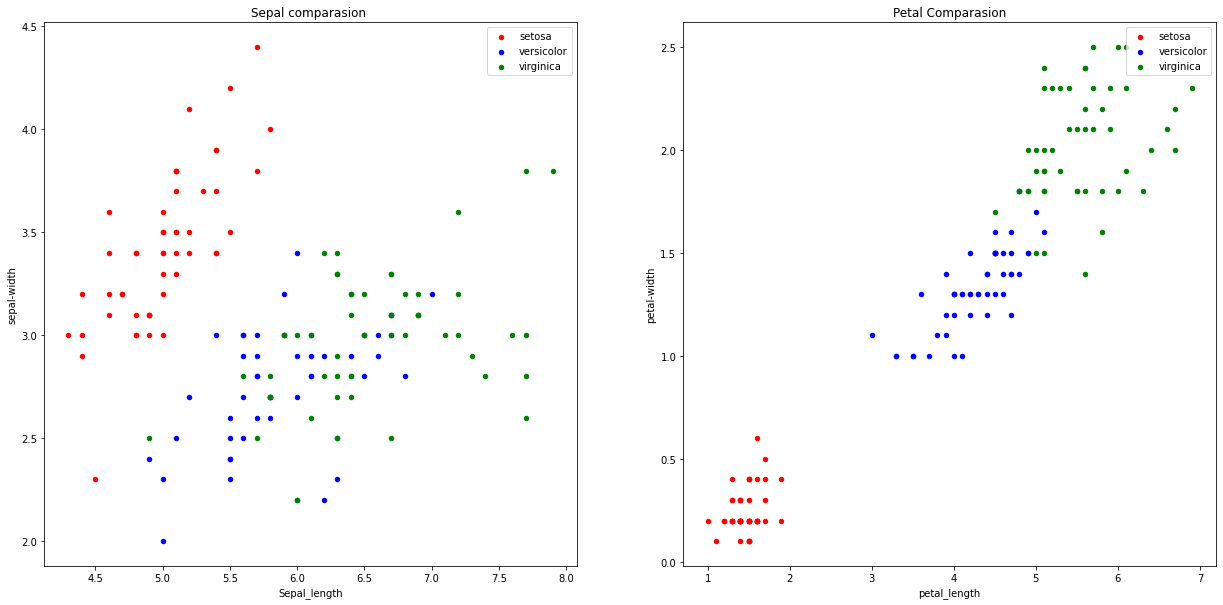

In [9]:
#Creating the variable for each species
setosa = iris_data[iris_data['species']=='setosa']
versicolor = iris_data[iris_data['species']=='versicolor']
virginica = iris_data[iris_data['species']=='virginica']

#for each Species ,let's check what is petal and sepal distibutuon
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(21, 10))

#Creating the scatter plot for each species with sepal length,width, petal length, width
setosa.plot(x="Sepal_length", y="sepal_width", kind="scatter",ax=ax[0],label='setosa',color='r')
versicolor.plot(x="Sepal_length",y="sepal_width",kind="scatter",ax=ax[0],label='versicolor',color='b')
virginica.plot(x="Sepal_length", y="sepal_width", kind="scatter", ax=ax[0], label='virginica', color='g')

setosa.plot(x="petal_length", y="petal_width", kind="scatter",ax=ax[1],label='setosa',color='r')
versicolor.plot(x="petal_length",y="petal_width",kind="scatter",ax=ax[1],label='versicolor',color='b')
virginica.plot(x="petal_length", y="petal_width", kind="scatter", ax=ax[1], label='virginica', color='g')

#Setting the axis
ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()
#show the graph
plt.show()

In both comparasion of sepal and petal, setosa spieces are separated than that of Versicolor and Virginica

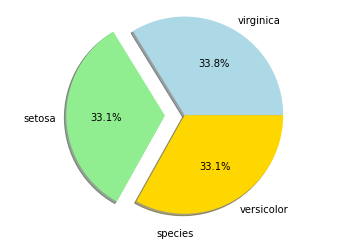

In [10]:
#Creating variable for calculating value count of species
a= iris_data['species'].value_counts()
#Creating the pie chart
species = a.index
count = a.values
colors= ['lightblue','lightgreen','gold']
explode = (0,0.2,0)
plt.pie(count, labels=species,shadow=True,colors=colors,explode = explode, autopct='%1.1f%%')
plt.xlabel('species')
plt.axis('equal')
#Showing the grapg
plt.show()

Here, we can see that virginica count are more than other two spieces

In [11]:
#Creating the variable  x and y
X=iris_data.iloc[:,0:4].values
y=iris_data.iloc[:,4].values

In [12]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []
# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

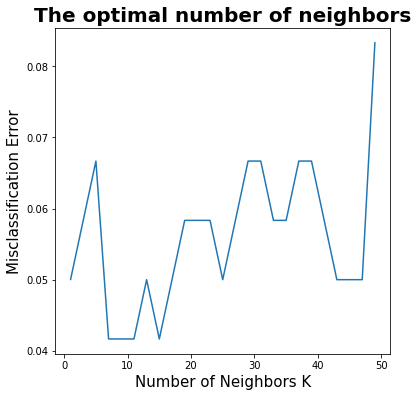

In [16]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
#Ploting the graph
plt.figure()
plt.figure(figsize=(6,6))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
#Showing the graph
plt.show()

In [17]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 7.


In [18]:
##I create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors = 7)
##Then Fit X train and y train to classifier
knn.fit(X_train, y_train)
##Predict on x test 
Y_pred = knn.predict(X_test) 
#Making the prediction on X_train
Y_pred1 = knn.predict(X_train)

In [19]:
#comparing actual response values (y_train with predicted response values (y_pred1)
print("KNN model accuracy(in %) for Training:", metrics.accuracy_score(y_train, Y_pred1)*100)
#comparing actual response values (y_test) with predicted response values (y_pred)
print("KNN model accuracy(in %) for Testing:", metrics.accuracy_score(y_test, Y_pred)*100)

KNN model accuracy(in %) for Training: 95.83333333333334
KNN model accuracy(in %) for Testing: 100.0


In [20]:
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
print('Confusion matrix for KNN\n',cm)
print('Overall accuracy_KNN : %.3f' %accuracy)

Confusion matrix for KNN
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  7]]
Overall accuracy_KNN : 1.000


In [21]:
cm_df = pd.DataFrame(cm, index=['Setosa','Versicolor','Virginica'], columns = ['Setosa','Versicolor','Virginica'])

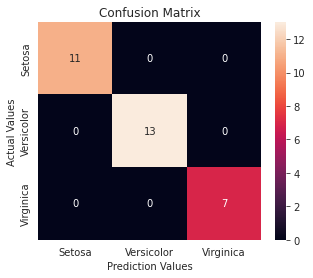

In [22]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot = True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Prediction Values')
plt.show()

In [ ]:
result1 = classification_report(y_test, Y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,Y_pred)
print("Overall Accuracy:",result2)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         7

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31

Overall Accuracy: 1.0


In [ ]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
print('Sensitivity:' ,TPR)
print('Specificity: ' ,TNR)
print('Precision:', PPV)
print('Negative Precision:' ,NPV)
print('False Positive Rate:' ,FPR)
print('False Negative Rate:' ,FNR)
print('False Discover Rate:', FDR)
print('Overall Accuracy',ACC)

Sensitivity: [1. 1. 1.]
Specificity:  [1. 1. 1.]
Precision: [1. 1. 1.]
Negative Precision: [1. 1. 1.]
False Positive Rate: [0. 0. 0.]
False Negative Rate: [0. 0. 0.]
False Discover Rate: [0. 0. 0.]
Overall Accuracy [1. 1. 1.]


In [ ]:
#k=3, 96
#k=5, 96
#k=7, 100